Link for document:
https://drive.google.com/drive/folders/1CLMUEDe4nZRJJ0ZkWbAfFnLvrPNFh6Vp?usp=sharing

# 1. Define and Validate Business Problem

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import ast
import matplotlib.pyplot as plt
from nlp_id.stopword import StopWord
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline

/home/afsyawn/Pacmann/Projek/Case3_CustomerFeedbackAnalyzer/virtualenv1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
score_data = pd.read_csv("document/gi_score_version.csv")
score_data.head()

,version,favorable_reviews,total_reviews,CSAT
0,1.0.0,3,3,100.000000
1,1.0.0_1112729_1135452,3848,4442,86.627645
2,1.0.1_1112729_1135452,454,571,79.509632
3,1.1.1_1437351_1398019,1049,1441,72.796669
4,1.2.0_1565149_1627898,794,1029,77.162293


In [3]:
score_data.describe()

,favorable_reviews,total_reviews,CSAT
count,39.000000,39.000000,39.000000
mean,601.384615,775.948718,75.243411
std,688.002204,778.550608,7.295771
min,3.000000,3.000000,60.434057
25%,341.000000,474.500000,70.874376
50%,439.000000,583.000000,73.621103
75%,572.500000,730.500000,78.860507
max,3848.000000,4442.000000,100.000000


In [4]:
version_data = {"version" : score_data["version"], "percentage" : score_data["CSAT"]}
version_data = pd.DataFrame(version_data)
version_data

,version,percentage
0,1.0.0,100.000000
1,1.0.0_1112729_1135452,86.627645
2,1.0.1_1112729_1135452,79.509632
3,1.1.1_1437351_1398019,72.796669
4,1.2.0_1565149_1627898,77.162293
5,1.3.0_1825294_1872772,81.941309
6,1.4.0_2154667_2147343,75.536481
7,1.4.1_2154667_2147343,78.211382
8,1.5.0_2574575_2578841,83.357245
9,1.6.0_2961400_3070488,82.470120


In [5]:
monthly_data = pd.read_csv("document/gi_score_month.csv")
monthly_data.head()

,year,month,favorable_reviews,total_reviews,percentage
0,2020,9,1237,1366,90.556369
1,2020,10,3228,3918,82.388974
2,2020,11,1209,1740,69.482759
3,2020,12,955,1258,75.914149
4,2021,1,604,840,71.904762


In [6]:
monthly_data.describe()

,year,month,favorable_reviews,total_reviews,percentage
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2022.204082,6.551020,678.795918,918.367347,71.207960
std,1.241296,3.470478,678.681626,783.089732,7.206912
min,2020.000000,1.000000,88.000000,116.000000,52.660300
25%,2021.000000,4.000000,393.000000,588.000000,66.666667
50%,2022.000000,7.000000,490.000000,688.000000,70.000000
75%,2023.000000,9.000000,710.000000,947.000000,75.222552
max,2024.000000,12.000000,4075.000000,4688.000000,90.556369


In [7]:
monthly_data = {"year" : monthly_data["year"],"month" : monthly_data["month"], "percentage" : monthly_data["percentage"]}
monthly_data = pd.DataFrame(monthly_data)

monthly_data["date"] = pd.to_datetime(monthly_data[["year", "month"]].assign(day=1))
monthly_data = monthly_data.sort_values(by= "date")
monthly_data = monthly_data[monthly_data["date"] < "2022-09-01"]

monthly_data

,year,month,percentage,date
0,2020,9,90.556369,2020-09-01
1,2020,10,82.388974,2020-10-01
2,2020,11,69.482759,2020-11-01
3,2020,12,75.914149,2020-12-01
4,2021,1,71.904762,2021-01-01
5,2021,2,79.662803,2021-02-01
6,2021,3,78.483607,2021-03-01
7,2021,4,74.815595,2021-04-01
8,2021,5,78.155340,2021-05-01
9,2021,6,78.960097,2021-06-01


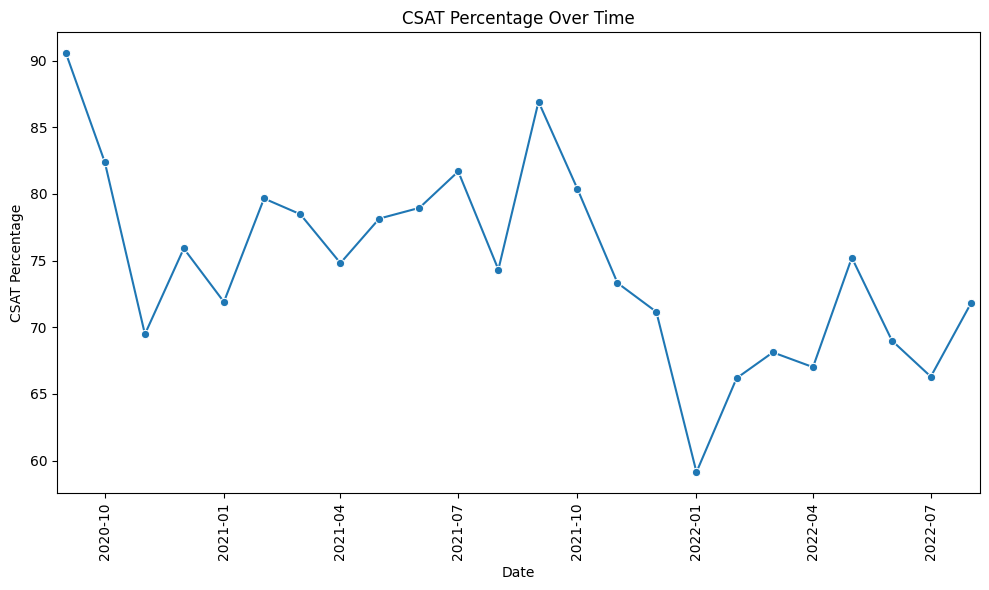

In [8]:
plt.figure(figsize=(10, 6))
mp = sns.lineplot(data=monthly_data, x="date", y="percentage", marker='o')

plt.title("CSAT Percentage Over Time")
plt.xlabel("Date")
plt.ylabel("CSAT Percentage")

plt.xticks(rotation=90)
plt.margins(x = 0.01)
plt.tight_layout()
plt.show()

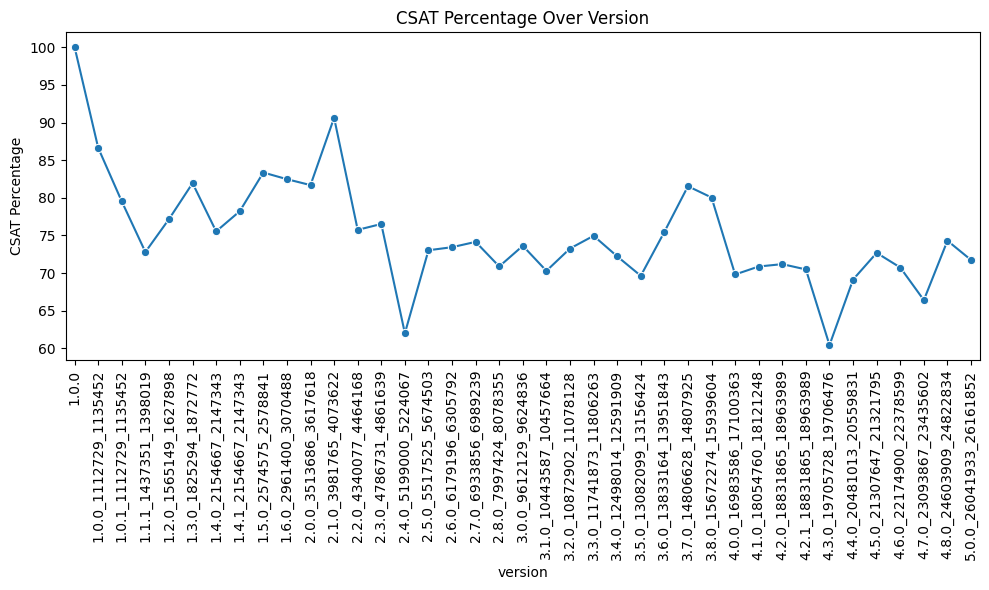

In [9]:
plt.figure(figsize=(10, 6))
sp = sns.lineplot(data=version_data, x="version", y="percentage", marker='o')

plt.title("CSAT Percentage Over Version")
plt.xlabel("version")
plt.ylabel("CSAT Percentage")

plt.xticks(rotation=90)
plt.margins(x = 0.01)
plt.tight_layout()
plt.show()

# 2. Data Preparation (cleaning)

In [10]:
#In another file and collab

https://colab.research.google.com/drive/1LgUDGxioc4Ubffya1zZrKlDCx_Skhyn_?hl=id#scrollTo=8Gg3zkj6tK57

# 3. Exploratory Data Analysis (EDA)

In [11]:
review_data = pd.read_csv("document/cleaned_data_content.csv")

In [12]:
review_data["content_conc"] = review_data["content"].str.replace(r"['\[\]\.,']", "", regex=True)
# review_data.to_csv("document/cleaned_data_content.csv", index=False)

## 1. Structure of dataset

In [13]:
print(f"Dataset head:\n{review_data.head()}\n")

Dataset head:
                               reviewId         userName  \
0  8041f57b-6f49-4065-9447-a7add558a1dc  Pengguna Google   
1  5bc6eece-7480-4c81-93cf-039613af1af2  Pengguna Google   
2  60bc7037-ad55-4dc6-a271-e0182ad5759d  Pengguna Google   
3  c8dbc71a-a681-46ec-aaba-8c1d6b052446  Pengguna Google   
4  9d597fba-5524-4384-a7ef-7f159fb04725  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  ['bug', 'melulu', 'lawan', 'dvalin', 'signora'...      3              0   
1  ['segi', 'grafik', 'bagus', 'spot', 'game', 's...      5            156   
2  ['game', 'bagus', 'update', 'data', 'download'...  

In [14]:
print(f"Total missing value:\n{review_data.isnull().sum()}\n")

Total missing value:
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    14738
at                          0
replyContent            41571
repliedAt               41571
appVersion              14738
review_lenght               0
content_conc                0
dtype: int64



In [15]:
print(f"Dataset type:\n{review_data.dtypes}")

Dataset type:
reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
review_lenght            int64
content_conc            object
dtype: object


## 2. Basic text statistic

In [16]:
review_data["review_lenght"] = review_data["content"].apply(len)
review_data.describe()

,score,thumbsUpCount,review_lenght
count,45000.000000,45000.000000,45000.000000
mean,4.036733,4.952733,122.076444
std,1.483588,52.291969,90.498762
min,1.000000,0.000000,2.000000
25%,3.000000,0.000000,58.000000
50%,5.000000,0.000000,95.000000
75%,5.000000,0.000000,157.000000
max,5.000000,5511.000000,1988.000000


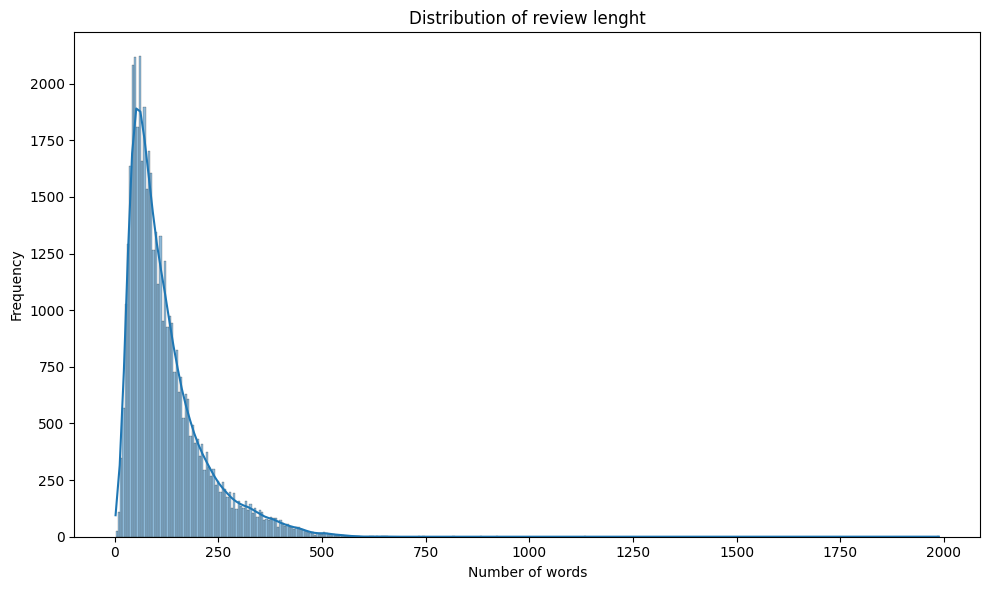

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=review_data["review_lenght"], kde=True)

plt.title("Distribution of review lenght")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

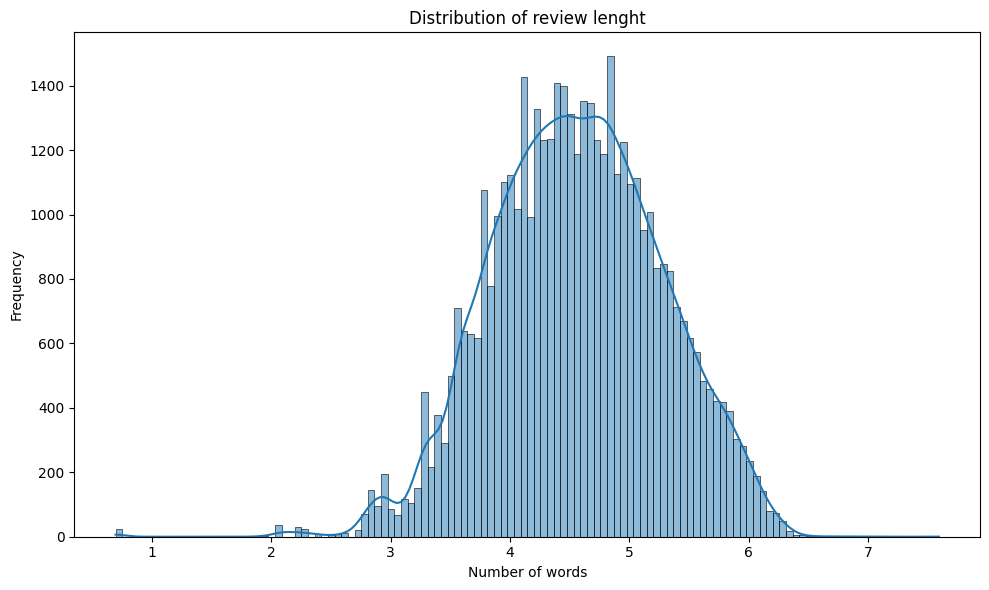

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data = np.log(review_data["review_lenght"]), kde=True)

plt.title("Distribution of review lenght")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

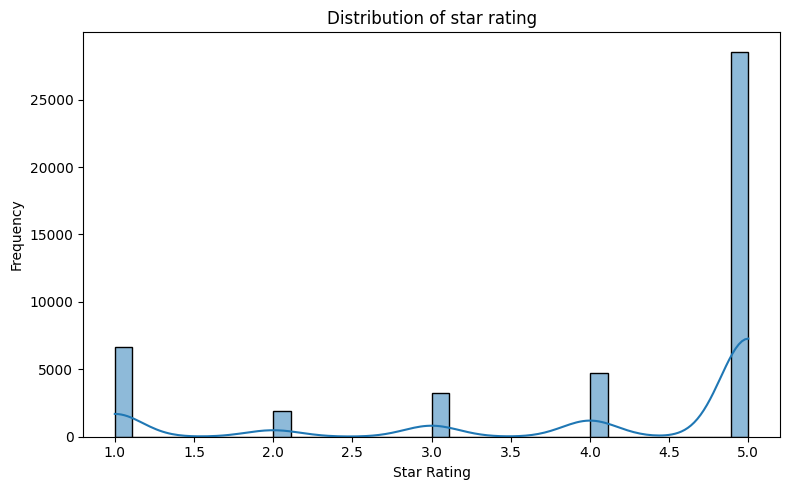

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=review_data["score"], kde=True)

plt.title("Distribution of star rating")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [20]:
monthly_star = review_data[["at", "score"]].copy()
monthly_star["date"] = pd.to_datetime(monthly_star["at"])

monthly_star["year"] = monthly_star["date"].dt.year
monthly_star["month"] = monthly_star["date"].dt.month

monthly_star = monthly_star.groupby(["year", "month", "score"]).size().reset_index(name='count')

monthly_star["date"] = pd.to_datetime(monthly_star[["year", "month"]].assign(day=1))

monthly_star = monthly_star.sort_values(by= "date").reset_index(drop=True)

monthly_star.head()

,year,month,score,count,date
0,2020,9,1,63,2020-09-01
1,2020,9,2,14,2020-09-01
2,2020,9,3,52,2020-09-01
3,2020,9,4,103,2020-09-01
4,2020,9,5,1134,2020-09-01


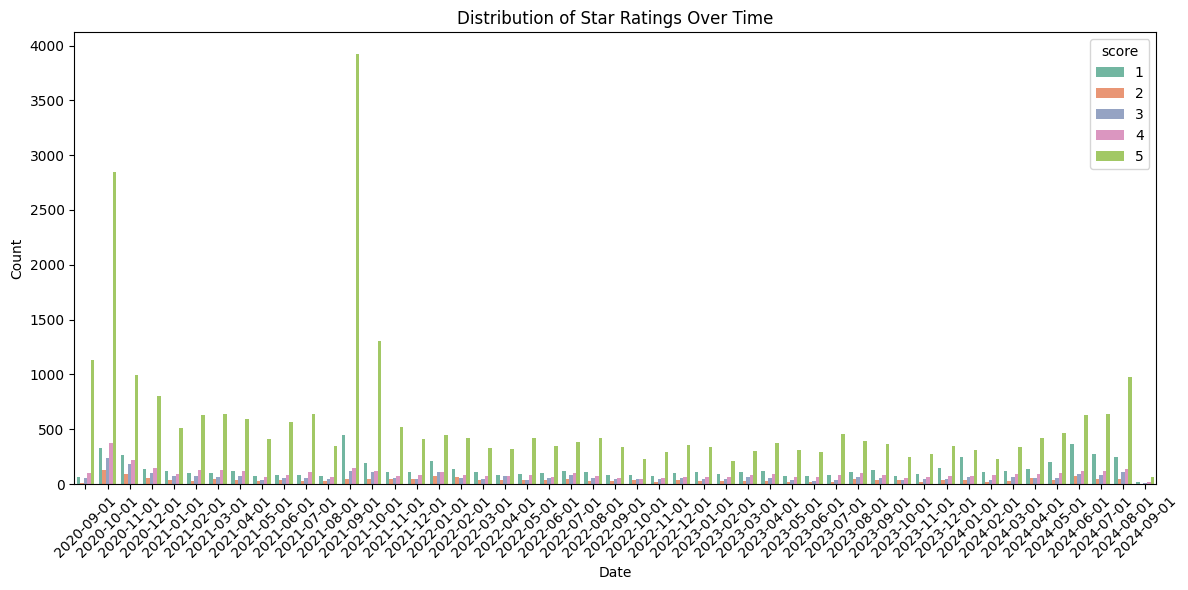

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_star,
            x = "date",
            y = "count",
            hue = "score",
            palette = "Set2"
)

plt.title('Distribution of Star Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Word frequent analysis

In [22]:
stopword = StopWord()
stop_words = stopword.get_stopword()
new = ["game", "gamenya", "kalau", "gak", "ga", "genshin", "impact", "main", "deh", "tolong", "mohon", "moga", "ku", "b", "ny", "nya", "the"]
stop_words.extend(new)

def remove_stopword(text):
    words = text.split()

    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    return ' '.join(filtered_words)

review_data["content_cleaned"] = review_data["content_conc"].apply(remove_stopword)

In [23]:
all_words = " ".join(review_data["content_cleaned"]).split()
word_freq = Counter(all_words)

data_words = [{"word" : word,
              "Frequency" : freq} for word, freq in word_freq.items()]

common_words = pd.DataFrame(data_words)

common_words = common_words.sort_values(by= "Frequency", ascending=False).reset_index(drop=True)

# common_words.to_csv("document/common_word_review.csv", index=False)

print(common_words.head())


     word  Frequency
0   bagus      20892
1      hp       8185
2  grafik       7125
3   kasih       4862
4    seru       4539


In [24]:
ast = " ".join(all_words[:100])
print(ast)

bug melulu lawan dvalin signora gambar pecah emg devicenya spek hp kentang versi coop lawan pyro regisvine musuh mati petrified tree muncul kalah musuh lapor cs tanggap segi grafik bagus spot foto lore dark kawan papa suka kejut ending story duga segi reward optimal konsisten bikin player ngeluh konten bagus sehat sehat dawei team bagus update data download data ekstrak nunggu ekstrak uji sabar make hp spek midrange males mainin udh daily reward player fp eksplor map tabung primo karakter udh butuh sempe spin karakter untung fitur custom artefak kayak njir harap wkwk elixir nunggu periode versi rilis elixir butuh


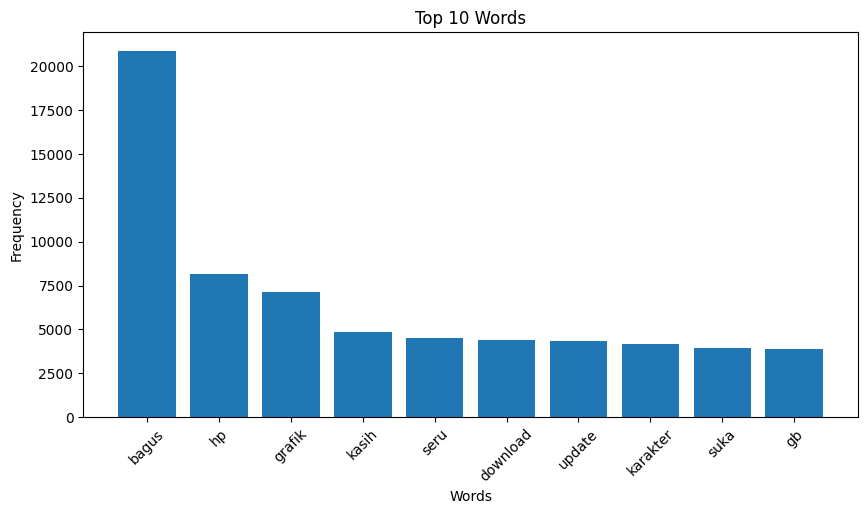

In [25]:
top_words = common_words.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_words["word"], top_words["Frequency"])

plt.xticks(rotation=45)
plt.title(f'Top 10 Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## 4. Bigrams and Trigrams (Phrases)

In [26]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
bigram_matrix = bigram_vectorizer.fit_transform(review_data["content_cleaned"])
bigram_freq = bigram_matrix.sum(axis=0)
bigrams = [(word, bigram_freq[0, idx]) for word, idx in bigram_vectorizer.vocabulary_.items()]

bigrams = dict(bigrams)

bigram_words = [{"bigram" : bigram,
                 "Frequency" : freq} for bigram, freq in bigrams.items()]

bigram_words = pd.DataFrame(bigram_words)

bigram_words = bigram_words.sort_values(by= "Frequency", ascending=False).reset_index(drop=True)

# bigram_words.to_csv("document/bigram_review.csv", index=False)

bigram_words.head()

/home/afsyawn/Pacmann/Projek/Case3_CustomerFeedbackAnalyzer/virtualenv1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'kurangnya', 'mata', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'olah', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'tama', 'yakinnya'] not in stop_words.
  warnings.warn(


,bigram,Frequency
0,grafik bagus,1804
1,bagus grafik,1420
2,hp kentang,1405
3,terima kasih,1403
4,kasih bintang,1114


In [27]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)
trigram_matrix = trigram_vectorizer.fit_transform(review_data["content_cleaned"])
trigram_freq = trigram_matrix.sum(axis=0)
trigrams = [(word, trigram_freq[0, idx]) for word, idx in trigram_vectorizer.vocabulary_.items()]

trigrams = dict(trigrams)

trigram_words = [{"bigram" : trigram,
                 "Frequency" : freq} for trigram, freq in trigrams.items()]

trigram_words = pd.DataFrame(trigram_words)

trigram_words = trigram_words.sort_values(by= "Frequency", ascending=False).reset_index(drop=True)

# trigram_words.to_csv("document/trigram_review.csv", index=False)

trigram_words.head()

/home/afsyawn/Pacmann/Projek/Case3_CustomerFeedbackAnalyzer/virtualenv1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'kurangnya', 'mata', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'olah', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'tama', 'yakinnya'] not in stop_words.
  warnings.warn(


,bigram,Frequency
0,bagus grafik bagus,371
1,terima kasih mihoyo,275
2,bagus segi grafik,203
3,alur cerita bagus,173
4,alur cerita tarik,172


## 5. Sentiment distribution 

In [28]:
#in collab

# 4. Feature Extraction

## 1. Bag of Words (BoW)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features= 1000, ngram_range=(1, 2))

bow_matrix = vectorizer.fit_transform(review_data["content_cleaned"])

bow_matrix_array = bow_matrix.toarray()

bow_df = pd.DataFrame(bow_matrix_array, columns=vectorizer.get_feature_names_out())

# bow_df.to_csv("document/BagOfWord.csv", index=False)
print(bow_df.head())

/home/afsyawn/Pacmann/Projek/Case3_CustomerFeedbackAnalyzer/virtualenv1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'kurangnya', 'mata', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'olah', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'tama', 'yakinnya'] not in stop_words.
  warnings.warn(


   abyss  adain  adakan  adik  admin  adventure  ah  air  ajar  ajg  ...  \
0      0      0       0     0      0          0   0    0     0    0  ...   
1      0      0       0     0      0          0   0    0     0    0  ...   
2      0      0       0     0      0          0   0    0     0    0  ...   
3      0      0       0     0      0          0   0    0     0    0  ...   
4      0      0       0     0      0          0   0    0     0    0  ...   

   world  worth  worth it  woy  xiao  yaa  yah  you  youtube  zhongli  
0      0      0         0    0     0    0    0    0        0        0  
1      0      0         0    0     0    0    0    0        0        0  
2      0      0         0    0     0    0    0    0        0        0  
3      0      0         0    0     0    0    0    0        0        0  
4      0      0         0    0     0    0    0    0        0        0  

[5 rows x 1000 columns]


## 2. TF-IDF (Term Frequency - Inverse Document Frequency)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features= 1000, ngram_range=(1, 2))

tfidf_matrix = tfidf_vectorizer.fit_transform(review_data["content_cleaned"])

tfidf_matrix_array = tfidf_matrix.toarray()

tfidf_df = pd.DataFrame(tfidf_matrix_array, columns=tfidf_vectorizer.get_feature_names_out())

# tfidf_df.to_csv("document/tfidf.csv", index=False)

print(tfidf_df.head())

/home/afsyawn/Pacmann/Projek/Case3_CustomerFeedbackAnalyzer/virtualenv1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'kurangnya', 'mata', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'olah', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'tama', 'yakinnya'] not in stop_words.
  warnings.warn(


   abyss  adain  adakan  adik  admin  adventure   ah  air  ajar  ajg  ...  \
0    0.0    0.0     0.0   0.0    0.0        0.0  0.0  0.0   0.0  0.0  ...   
1    0.0    0.0     0.0   0.0    0.0        0.0  0.0  0.0   0.0  0.0  ...   
2    0.0    0.0     0.0   0.0    0.0        0.0  0.0  0.0   0.0  0.0  ...   
3    0.0    0.0     0.0   0.0    0.0        0.0  0.0  0.0   0.0  0.0  ...   
4    0.0    0.0     0.0   0.0    0.0        0.0  0.0  0.0   0.0  0.0  ...   

   world  worth  worth it  woy  xiao  yaa  yah  you  youtube  zhongli  
0    0.0    0.0       0.0  0.0   0.0  0.0  0.0  0.0      0.0      0.0  
1    0.0    0.0       0.0  0.0   0.0  0.0  0.0  0.0      0.0      0.0  
2    0.0    0.0       0.0  0.0   0.0  0.0  0.0  0.0      0.0      0.0  
3    0.0    0.0       0.0  0.0   0.0  0.0  0.0  0.0      0.0      0.0  
4    0.0    0.0       0.0  0.0   0.0  0.0  0.0  0.0      0.0      0.0  

[5 rows x 1000 columns]


## 3. Word Embeddings 

In [33]:
from gensim.models import Word2Vec

In [34]:
tokenized = [review.split() for review in review_data["content_cleaned"]]

w2v_model = Word2Vec(tokenized, vector_size=100, window=5, min_count=2, sg=1)

word_vector = w2v_model.wv["bug"]
print(word_vector)

[ 0.39203212 -0.41245565  0.03651143  0.34761968  0.09291862 -0.3047075
 -0.21403281  0.4013714   0.47916332 -0.272939    0.16179419  0.1250508
 -0.37715065 -0.09426122  0.02711563  0.42204764 -0.09825324 -0.36211872
  0.45182067 -0.69088334 -0.04829788 -0.32449883  0.26827568 -0.14131728
 -0.05840877 -0.19224176  0.0727998   0.18638991 -0.23870797  0.49881497
  0.45312363 -0.13260287  0.8621372  -0.10908789 -0.16431822  0.01687528
 -0.24114974 -0.60882175 -0.54701775 -0.22550337  0.08325557  0.01192698
 -0.42322034  0.08778604  0.51160246 -0.2472829  -0.07773296 -0.12927231
 -0.1184063   0.5591738  -0.37641385  0.22507271 -0.04285287  0.28786868
 -0.3418827   0.04868375  0.01544832  0.1445607  -0.5079323   0.40031344
 -0.2241886  -0.21661255 -0.06507384 -0.0725987  -0.47324386  0.01988682
  0.07953746  0.20396943 -0.24388367  0.6937578   0.1885659   0.05062542
  0.14020288  0.02461598  0.23348221 -0.35408068  0.01892494 -0.21546598
 -0.24983348  0.28943926  0.52851385 -0.59209025 -0.4

In [35]:
def get_review_vector(tokens, model):
    vector = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vector, axis=0) if vector else np.zeros(100)

review_vector = [get_review_vector(tokens, w2v_model) for tokens in tokenized]

review_vector_df = pd.DataFrame(review_vector)

# review_vector_df.to_csv("document/review_vector.csv", index=False)

print(review_vector_df.head())

         0         1         2         3         4         5         6   \
0  0.165196 -0.087018  0.251277  0.093745  0.074285 -0.244156  0.103499   
1  0.041736  0.012853  0.066332 -0.081746  0.154567 -0.271667  0.120808   
2  0.071641  0.002679  0.002184 -0.012892  0.056962 -0.332866  0.077098   
3  0.114297 -0.060096 -0.024765 -0.136007  0.027468 -0.275887  0.158098   
4 -0.007438 -0.029577  0.148197  0.020780  0.091544 -0.318872  0.041824   

         7         8         9   ...        90        91        92        93  \
0  0.260908 -0.040243  0.051423  ...  0.283015  0.176665  0.100264 -0.108342   
1  0.237110 -0.029220  0.018728  ...  0.233163  0.098044 -0.033793 -0.025788   
2  0.149088 -0.177688  0.002939  ...  0.247135  0.224231  0.015581  0.114194   
3  0.044151 -0.138124  0.080532  ...  0.251894  0.167037  0.052902 -0.059611   
4  0.261088  0.077112 -0.006976  ...  0.308090  0.150071  0.007487  0.007243   

         94        95        96        97        98        99  
0  0

## Sentiment Polarity

In [36]:
from textblob import TextBlob

In [37]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def polarity(num):
    if num == 0:
        return "Netral"
    elif num > 0:
        return "Positif"
    else:
        return "Negatif"

review_data["sentiment_polarity"] = review_data["content_cleaned"].apply(get_sentiment)

review_data["sentiment"] = review_data["sentiment_polarity"].apply(polarity)

print(review_data[["content_conc", "sentiment_polarity", "sentiment"]].head())

                                        content_conc  sentiment_polarity  \
0  bug melulu lawan dvalin signora gambar pecah e...            0.000000   
1  segi grafik bagus spot game seperti foto lore ...           -0.150000   
2  game bagus update data download data ekstrak t...            0.000000   
3  fitur custom artefak kayak njir harap wkwk dap...            0.000000   
4  alam main senang jalan cerita tarik tidak mono...            0.394444   

  sentiment  
0    Netral  
1   Negatif  
2    Netral  
3    Netral  
4   Positif  


## 5 Topic Modelling

### 1. Clustering Algorithm

- LDA

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

In [39]:
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(bow_matrix)

topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    topics.append(topic_words)

In [40]:
print(topics)

[['pelit', 'event', 'anniversary', 'mihoyo', 'kasih bintang', 'reward', 'bagus', 'hadiah', 'bintang', 'kasih'], ['tualang', 'bikin', 'download', 'seru', 'open world', 'open', 'world', 'akun', 'bagus', 'suka'], ['simpan', 'bagus', 'hapus', 'download data', 'login', 'masuk', 'gb', 'data', 'update', 'download'], ['hitam', 'biar', 'cepat', 'cari', 'bug', 'bagus', 'artefak', 'resin', 'susah', 'fitur'], ['overall', 'android', 'device', 'mobile', 'grafis', 'pc', 'berat', 'sayang', 'hp', 'bagus'], ['sistem', 'ampas', 'top', 'susah', 'up', 'bagus', 'rate', 'karakter', 'seru', 'gacha'], ['story', 'bagus', 'terimakasih', 'player', 'karakter', 'quest', 'terima kasih', 'terima', 'mihoyo', 'kasih'], ['ukur', 'gede', 'kuat', 'besar', 'bagus', 'hp kentang', 'ram', 'gb', 'kentang', 'hp'], ['mantap', 'bagus grafik', 'seru', 'karakter', 'tarik', 'grafik bagus', 'keren', 'cerita', 'grafik', 'bagus'], ['spek', 'grafik', 'server', 'jaring', 'ping', 'bagus', 'patah', 'lag', 'lancar', 'hp']]


My topic intrepertation
- Topic #0 : Pengalaman gacha in-game (general)
- Topic #1 : Spesifikasi game
- Topic #2 : Jaringan
- Topic #3 : RNG & reward drop
- Topic #4 : Perbandingan experience mobile dengan PC
- Topic #5 : Pengaturan system gacha
- Topik #6 : Apresiasi pada developer
- Topik #7 : Spesifikasi device untuk bermain (negatif)
- Topik #8 : Pengalaman bermain
- Topik #9 : Permintaan fitur in-game

In [41]:
# """
# Run this code to check coherence score
# # """
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Create a dictionary from the documents
dictionary = Dictionary(tokenized)

# Create the corpus (bag-of-words representation)
corpus = [dictionary.doc2bow(doc) for doc in tokenized]

# Compute coherence using gensim's CoherenceModel
coherence_model = CoherenceModel(topics=topics, 
                                 texts=tokenized, 
                                 dictionary=dictionary, 
                                 corpus=corpus, 
                                 coherence='c_v')

# Get the coherence score
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.5719760457467992


In [42]:
import pyLDAvis
import pyLDAvis.gensim_models

In [43]:
# # Prepare the visualization
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# # Save the visualization to an HTML file
# pyLDAvis.save_html(vis, 'lda_visualization.html')

# # Display the visualization directly in Jupyter Notebook or Google Colab
# pyLDAvis.display(vis)

- K-Means

In [44]:
from sklearn.cluster import KMeans

In [45]:
# num_cluster = 5
# kmeans = KMeans(n_clusters=num_cluster, random_state=42)
# kmeans.fit(tfidf_matrix)

# review_data["cluster"] = kmeans.labels_

# print(review_data["cluster"])

In [46]:
# # Get feature names
# feature_names = tfidf_vectorizer.get_feature_names_out()

# # Display top terms for each cluster
# for i, cluster_center in enumerate(kmeans.cluster_centers_):
#     top_terms = np.argsort(cluster_center)[-10:]  # Get top 10 terms
#     print(f"Cluster {i} top terms:")
#     print([feature_names[j] for j in top_terms])
#     print()

In [47]:
# from sklearn.metrics import silhouette_score

# silhouette_avg = silhouette_score(tfidf_matrix, review_data["cluster"])
# print(f'Silhouette Score: {silhouette_avg}')

### 2. Assign cluster to review

In [48]:
review_data["content_cleaned"].head()

0    bug melulu lawan dvalin signora gambar pecah e...
1    segi grafik bagus spot foto lore dark kawan pa...
2    bagus update data download data ekstrak nunggu...
3    fitur custom artefak kayak njir harap wkwk eli...
4    alam senang jalan cerita tarik monoton mini qu...
Name: content_cleaned, dtype: object

In [49]:
topic_distribution = lda_model.transform(bow_matrix)

review_data["topic"] = topic_distribution.argmax(axis=1)

print(review_data[["content_cleaned", "topic"]].head())

                                     content_cleaned  topic
0  bug melulu lawan dvalin signora gambar pecah e...      3
1  segi grafik bagus spot foto lore dark kawan pa...      8
2  bagus update data download data ekstrak nunggu...      5
3  fitur custom artefak kayak njir harap wkwk eli...      3
4  alam senang jalan cerita tarik monoton mini qu...      6


In [50]:
topic_distribution = review_data["topic"].value_counts()
print(topic_distribution)

topic
8    7590
2    5792
0    4898
7    4380
6    4110
9    3859
1    3819
3    3728
5    3716
4    3108
Name: count, dtype: int64


In [51]:
review_by_topic = review_data.groupby("topic")["content_cleaned"].apply(lambda text: " ".join(text))

print(review_by_topic)

topic
0    terima kasih mihoyo teman suka segi grafis sto...
1    gabisa ketemu player dragon nest ketemu player...
2    login wifi lancar pakai device infinix note ng...
3    bug melulu lawan dvalin signora gambar pecah e...
4    bagus puas grafik puzzlenya fiturnya yah jarin...
5    bagus update data download data ekstrak nunggu...
6    alam senang jalan cerita tarik monoton mini qu...
7    just wanna say thank you update an salah updat...
8    segi grafik bagus spot foto lore dark kawan pa...
9    lumayan seru story bagus gameplay asik lag pat...
Name: content_cleaned, dtype: object


In [52]:
review_data.to_csv("document/gi_review_analized.csv")

# 6. Data Vizualitation

In [53]:
def plot_mostcommon(topic, top_n=5):
    words = ' '.join(review_data[review_data["topic"] == topic]["content_cleaned"])
    words = words.split()
    word_counts = Counter(words)
    
    word_freq_df = pd.DataFrame(word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

    top_words = word_freq_df.head(top_n)

    plt.figure(figsize=(10, 5))
    plt.bar(top_words["word"], top_words["count"], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Words in Topic: {topic}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

- Topic #0 : Aspek positif dari game

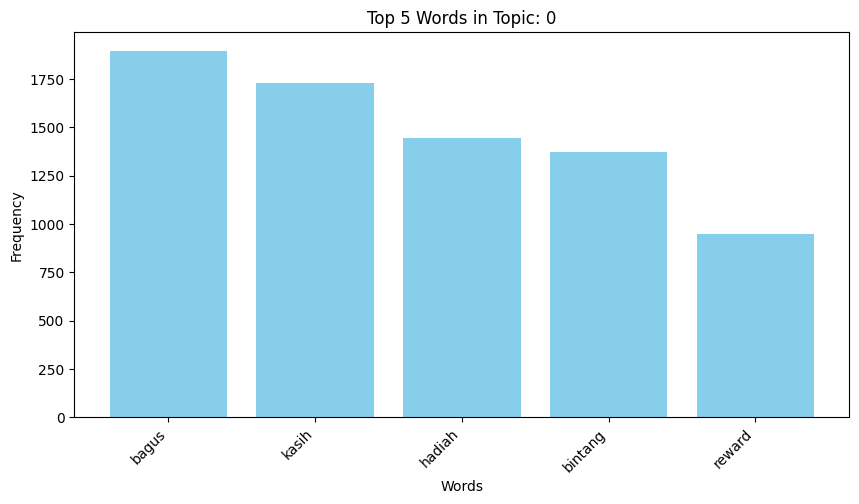

In [54]:
plot_mostcommon(0)

- Topic #1 : Isu performa pada device berbeda (Fitur) 

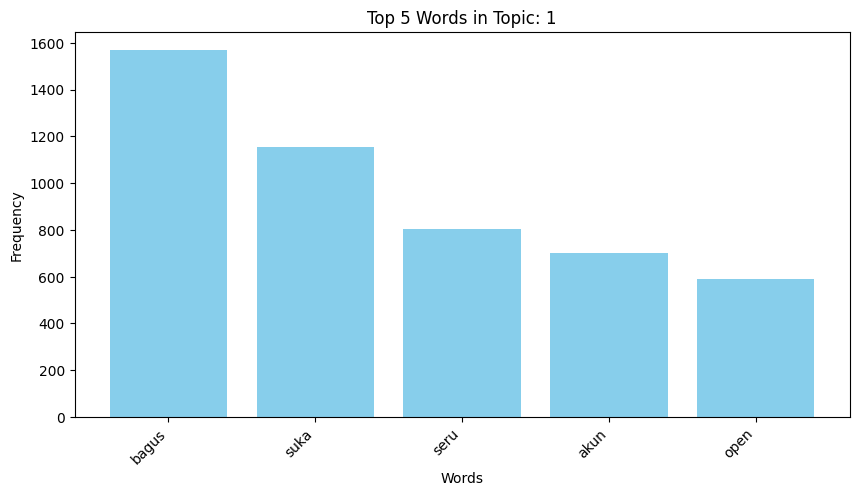

In [55]:
plot_mostcommon(1)

- Topic #2 : Kualitas cerita dan grafik game (positif)


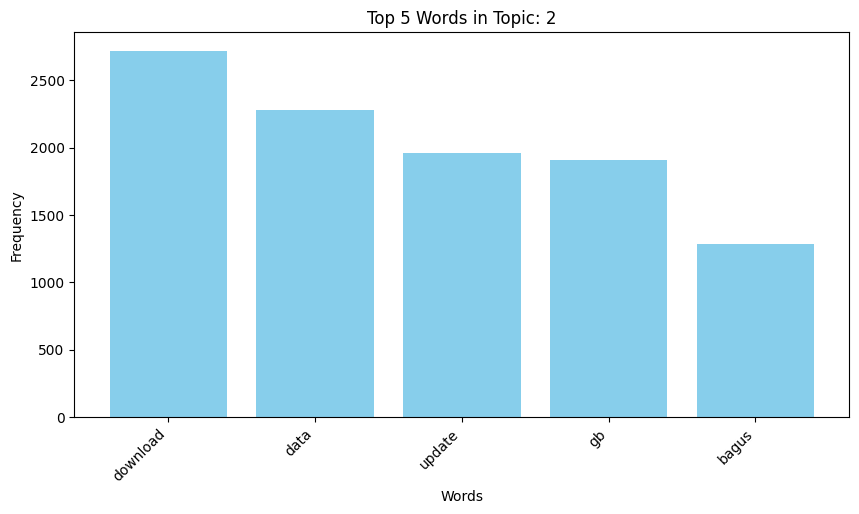

In [56]:
plot_mostcommon(2)

- Topic #3 : Isu pada in-game performa


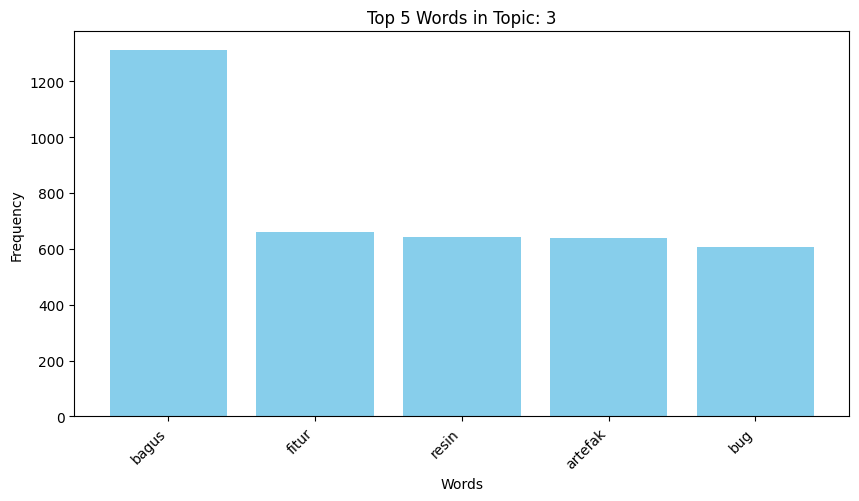

In [57]:
plot_mostcommon(3)

- Topic #4 : Permintaan untuk perubahan atau tambahan fitur

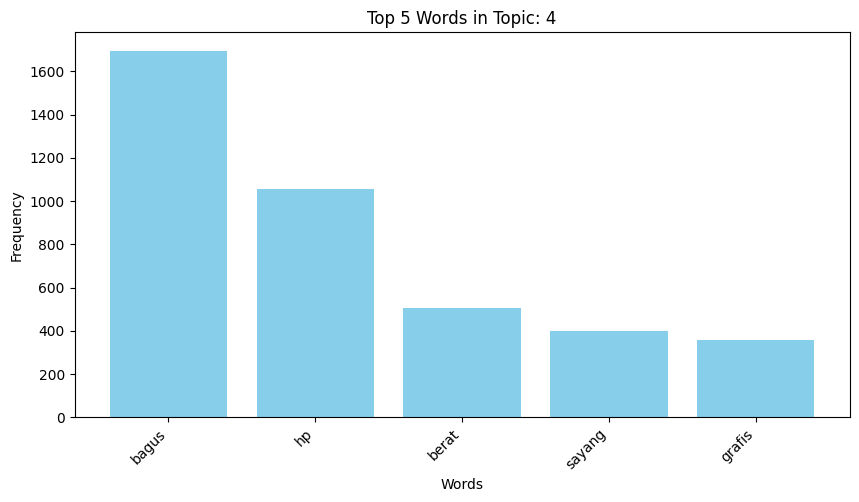

In [58]:
plot_mostcommon(4)

- Topik #5 : Isu pada login fitur

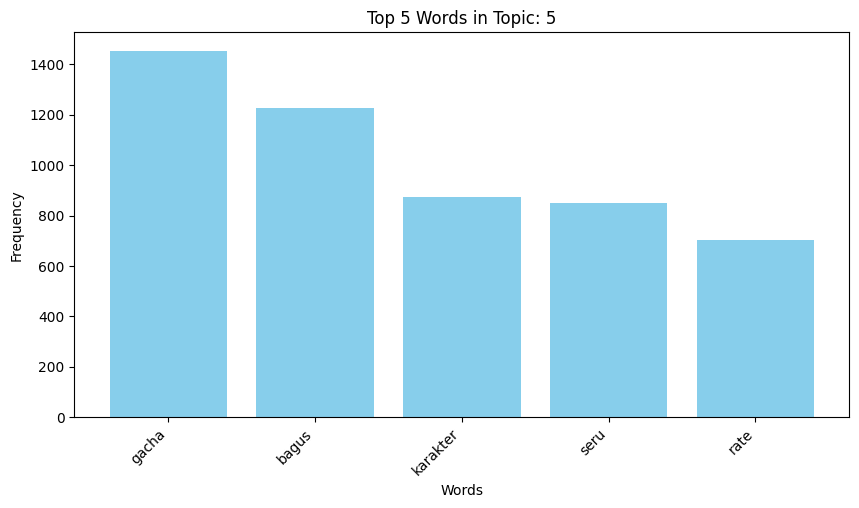

In [59]:
plot_mostcommon(5)


- Topic #6 : Isu pada hadiah yang didapat

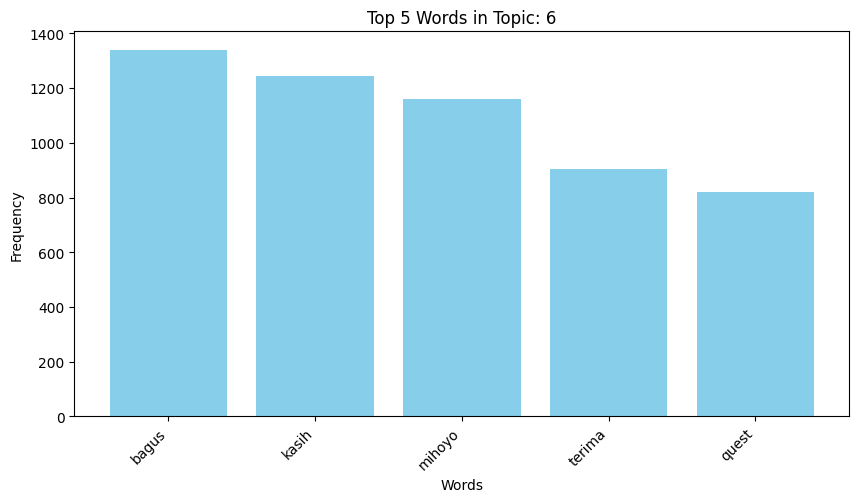

In [60]:
plot_mostcommon(6)

- Topik #7 : Isu pada in-game fitur


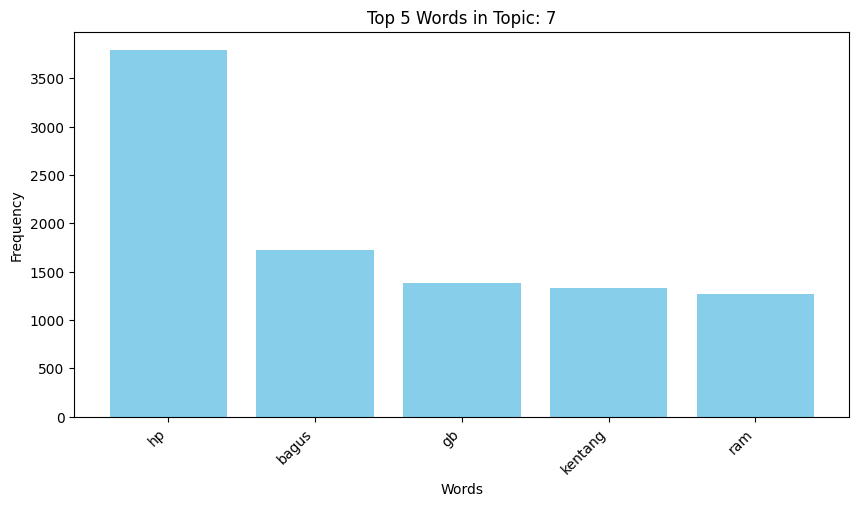

In [61]:
plot_mostcommon(7)

- Topik #8 : Apresiasi pada developer


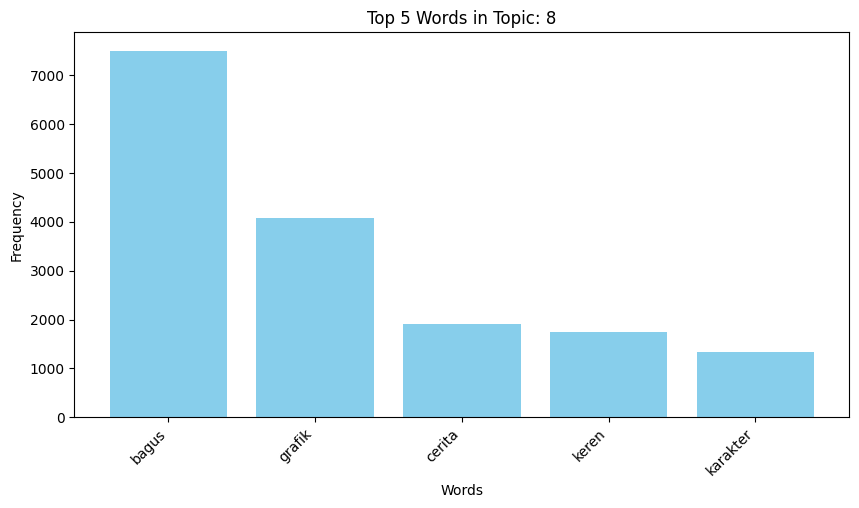

In [62]:
plot_mostcommon(8)

- Topik #9 : Isu pada pengalaman bermain

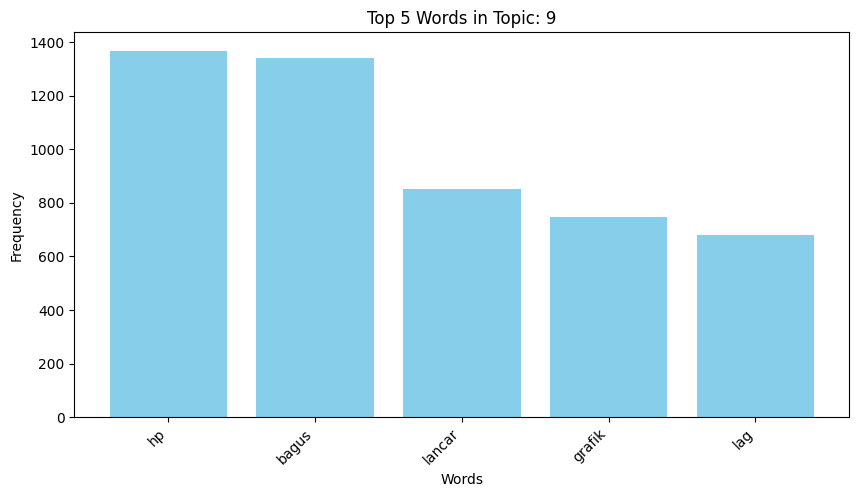

In [63]:
plot_mostcommon(9)

In [64]:
monthly_topic = review_data[["at", "topic"]].copy()
monthly_topic["date"] = pd.to_datetime(monthly_topic["at"])

monthly_topic["year"] = monthly_topic["date"].dt.year
monthly_topic["month"] = monthly_topic["date"].dt.month

monthly_topic = monthly_topic.groupby(["year", "month", "topic"]).size().reset_index(name='count')

monthly_topic["date"] = pd.to_datetime(monthly_topic[["year", "month"]].assign(day=1))

monthly_topic = monthly_topic.sort_values(by= "date").reset_index(drop=True)

monthly_topic.head()

,year,month,topic,count,date
0,2020,9,0,106,2020-09-01
1,2020,9,1,114,2020-09-01
2,2020,9,2,78,2020-09-01
3,2020,9,3,44,2020-09-01
4,2020,9,4,189,2020-09-01


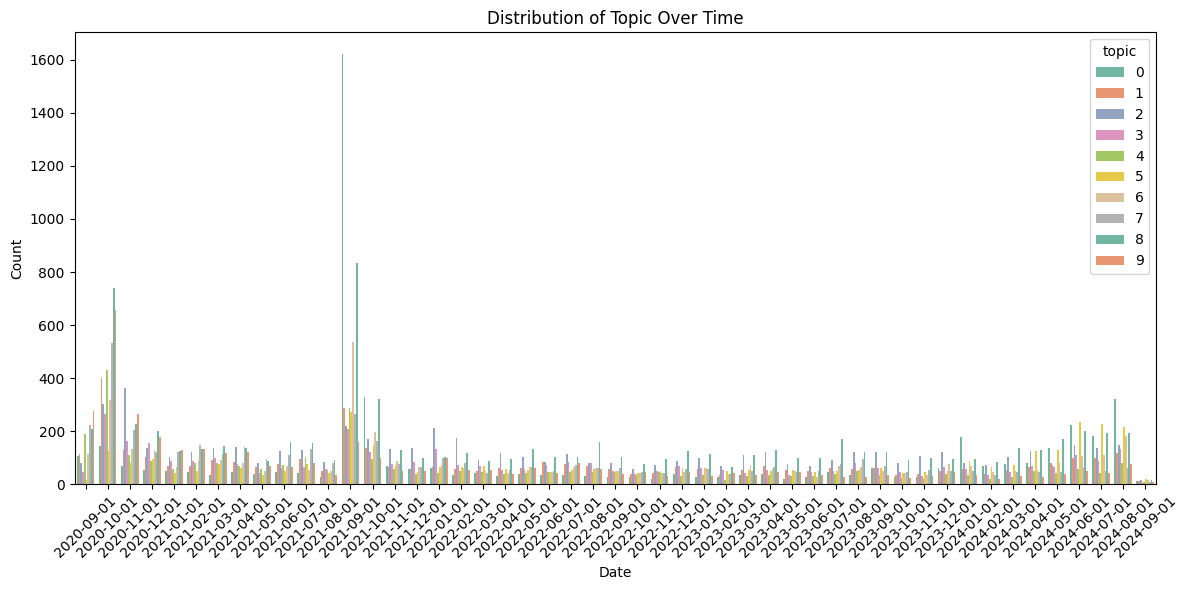

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_topic,
            x = "date",
            y = "count",
            hue = "topic",
            palette = "Set2"
)

plt.title('Distribution of Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Topic #0 : Aspek positif dari game
- Topic #1 : Isu performa pada device berbeda (Fitur) 
- Topic #2 : Kualitas cerita dan grafik game (positif)
- Topic #3 : Isu pada in-game performa
- Topic #4 : Permintaan untuk perubahan atau tambahan fitur
- Topic #5 : Isu pada login fitur
- Topik #6 : Isu pada hadiah yang didapat
- Topik #7 : Isu pada in-game fitur
- Topik #8 : Apresiasi pada developer
- Topik #9 : Pengalaman bermain

In [66]:
year_topic = monthly_topic[(monthly_topic["date"] > "2023-12-01") & (monthly_topic["date"] < "2024-09-01")]
year_topic = year_topic[["date", "topic", "count"]]
year_topic

,date,topic,count
400,2024-01-01,8,93
401,2024-01-01,7,50
402,2024-01-01,6,70
403,2024-01-01,5,85
404,2024-01-01,9,36
...,...,...,...
475,2024-08-01,2,147
476,2024-08-01,3,133
477,2024-08-01,1,117
478,2024-08-01,0,321


In [67]:
year_topic_wide = year_topic.pivot(index="date", columns="topic", values="count")
year_topic_wide.head()

topic,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
2024-01-01,176,55,79,55,34,85,70,50,93,36
2024-02-01,67,38,73,35,18,63,47,36,85,21
2024-03-01,77,53,102,46,27,73,50,44,136,31
2024-04-01,81,65,124,69,48,125,53,44,130,27
2024-05-01,137,78,72,66,41,129,79,44,171,38


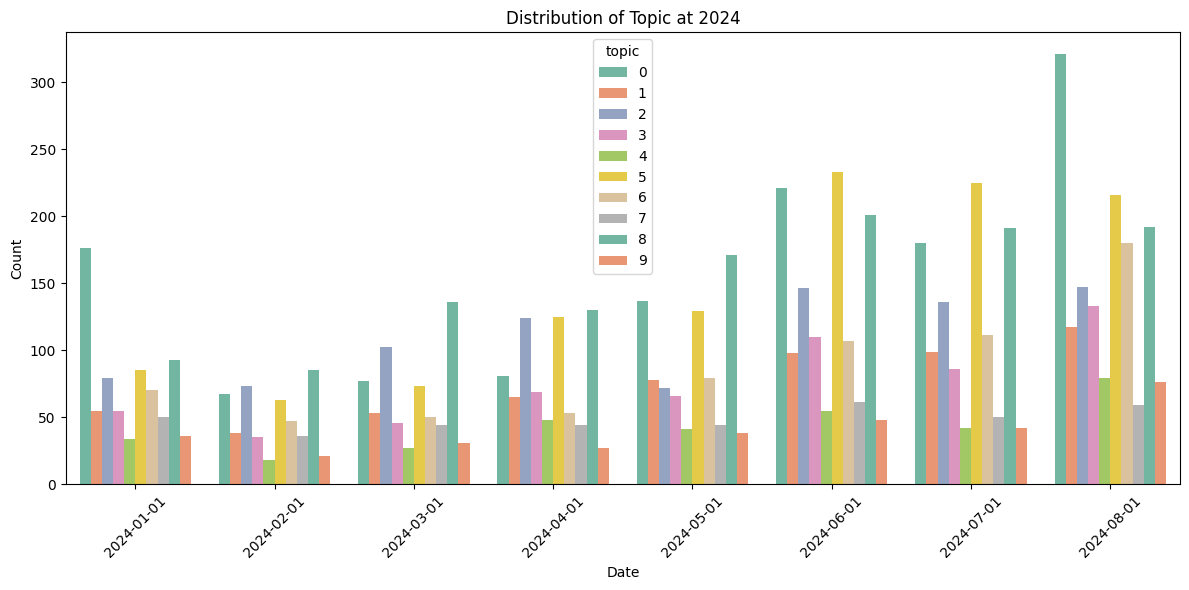

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(data=year_topic,
            x = "date",
            y = "count",
            hue = "topic",
            palette = "Set2"
)

plt.title('Distribution of Topic at 2024')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

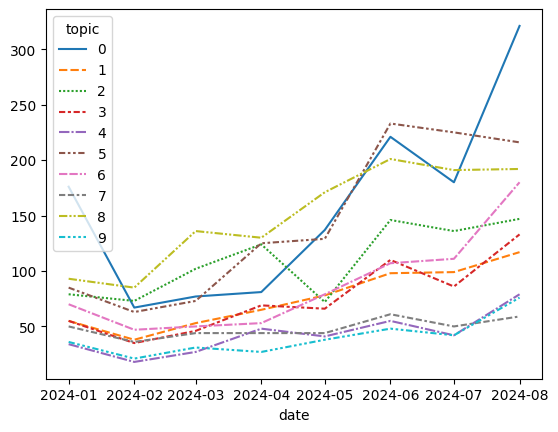

In [69]:
sns.lineplot(data=year_topic_wide)

My topic intrepertation
- Topic #0 : Pemberian hadiah dan event
- Topic #1 : Spesifikasi game
- Topic #2 : Jaringan
- Topic #3 : RNG & reward drop
- Topic #4 : Perbandingan experience mobile dengan PC
- Topic #5 : Pengaturan system gacha
- Topik #6 : Apresiasi pada developer
- Topik #7 : Spesifikasi device untuk bermain
- Topik #8 : Jalan cerita dan grafik
- Topik #9 : Performa game

Berdasarkan urgenitas:
1. Topic #0 : Pemberian hadiah dan event
2. Topic #5 : Pengaturan system gacha
3. Topik #8 : Jalan cerita dan grafik
4. Topik #6 : Apresiasi pada developer
5. Topic #2 : Jaringan
6. Topic #3 : RNG & reward drop 
7. Topic #1 : Spesifikasi game
8. Topic #4 : Perbandingan experience mobile dengan PC
9. Topik #9 : Performa game
10. Topik #7 : Spesifikasi device untuk bermain 

Berdasarkan waktu (yang memungkinkan untuk dikerjakan dengan constrains waktu yg diberikan):
1. Topik #6 : Apresiasi pada developer
2. Topik #8 : Pengalaman bermain
3. Topic #0 : Pengalaman gacha in-game
4. Topik #9 : Permintaan fitur in-game (Ex: quest & resin)
5. Topic #5 : Pengaturan system gacha
6. Topic #3 : RNG & reward drop
7. Topic #1 : Spesifikasi game 
8. Topic #2 : Jaringan
9. Topik #7 : Spesifikasi device untuk bermain (negatif)
10. Topic #4 : Perbandingan experience mobile dengan PC

Berdasarkan dampak yang diberikan:
1. Topik #9 : Permintaan fitur in-game (Ex: quest & resin)
2. Topic #3 : RNG & reward drop
3. Topic #5 : Pengaturan system gacha
4. Topic #2 : Jaringan
5. Topik #7 : Spesifikasi device untuk bermain (negatif)
6. Topic #1 : Spesifikasi game
7. Topik #8 : Pengalaman bermain (general)
8. Topic #0 : Pengalaman gacha in-game(general)
9. Topic #4 : Perbandingan experience mobile dengan PC
10. Topik #6 : Apresiasi pada developer

In [72]:
topic_rate = {"Topic" : ["Topic #0",
                         "Topic #1",
                         "Topic #2",
                         "Topic #3",
                         "Topic #4",
                         "Topic #5",
                         "Topik #6",
                         "Topik #7",
                         "Topik #8",
                         "Topik #9"],
              "Urgensi" : [1, 7, 5, 6, 8, 2, 4, 10, 3, 9],
              "Time_constraint" : [3, 7, 8, 6, 10, 5, 1, 9, 2, 4],
              "Dampak" : [8, 6, 4, 2, 9, 3, 10, 5, 7, 1]}

topic_rate_df = pd.DataFrame(data = topic_rate)
topic_rate_df["Total"] = (topic_rate_df["Urgensi"] + topic_rate_df["Time_constraint"] + topic_rate_df["Dampak"]) / 3
topic_rate_df

,Topic,Urgensi,Time_constraint,Dampak,Total
0,Topic #0,1,3,8,4.000000
1,Topic #1,7,7,6,6.666667
2,Topic #2,5,8,4,5.666667
3,Topic #3,6,6,2,4.666667
4,Topic #4,8,10,9,9.000000
5,Topic #5,2,5,3,3.333333
6,Topik #6,4,1,10,5.000000
7,Topik #7,10,9,5,8.000000
8,Topik #8,3,2,7,4.000000
9,Topik #9,9,4,1,4.666667


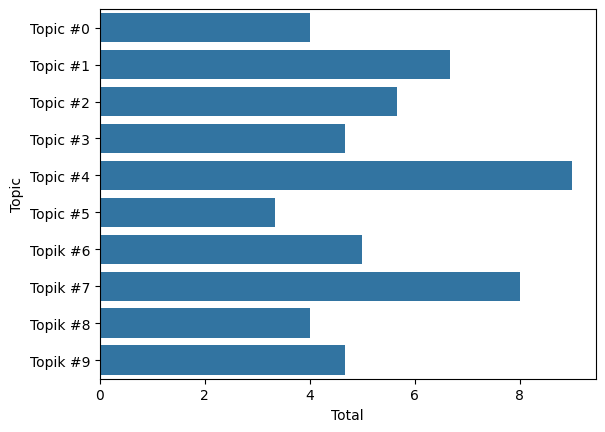

In [73]:
sns.barplot(data=topic_rate_df,
            x = "Total",
            y = "Topic",
            )

plt.show()

- Topic #0 : Pemberian hadiah dan event
- Topic #1 : Spesifikasi game
- Topic #2 : Jaringan
- Topic #3 : RNG & reward drop
- Topic #4 : Perbandingan experience mobile dengan PC
- Topic #5 : Pengaturan system gacha
- Topik #6 : Apresiasi pada developer
- Topik #7 : Spesifikasi device untuk bermain
- Topik #8 : Jalan cerita dan grafik
- Topik #9 : Performa game

Semakin kecil nilai total topik maka semakin tinggi untuk diprioritaskan, jadi dari data tersebut bisa diambil 4 topik prioritas, yaitu:
1. Topic #5 : Pengaturan system gacha
2. Topik #8 : Jalan cerita dan grafik
3. Topic #0 : Pemberian hadiah dan event
4. Topic #3 : RNG & reward drop


1. Jalan cerita dan grafik
- Inovasi dalam Jalan Cerita
1. Keputusan Pemain yang Berdampak: Setiap keputusan yang diambil pemain dalam dialog atau misi dapat memengaruhi alur cerita secara signifikan. Pemain bisa membuka atau menutup akses ke quest dan hubungan antar karakter berdasarkan pilihan mereka.
2. Cerita Paralel: Narasi berlapis dengan alur cerita berbeda di tiap wilayah atau karakter. Meskipun terhubung dengan peristiwa utama, cerita ini bisa berkembang secara independen, memberikan pemahaman mendalam tentang dunia dan tokoh-tokohnya.
Character-Driven Side Quests
3. Pengembangan Karakter Melalui Side Quests: Side quests yang mendalam bisa mengeksplorasi konflik pribadi atau masa lalu karakter, meningkatkan pengembangan narasi dan hubungan antara karakter pendukung dengan pemain.
4. Cerita Episodik yang Berkembang: Narasi cerita yang dibagi menjadi beberapa episode yang diluncurkan sepanjang musim atau event besar, menjaga pemain tetap terlibat dengan cliffhangers dan perkembangan cerita yang real-time.
5.Eksplorasi Lore Secara Aktif: Pemain dapat menemukan elemen lore dunia melalui misi tersembunyi atau artefak interaktif yang memperdalam pengetahuan tentang sejarah dan misteri Teyvat.
6. Event Cerita Dinamis yang Dipengaruhi Pemain: Event naratif yang dipengaruhi oleh pilihan komunitas pemain global, memungkinkan perubahan jalan cerita di event berikutnya berdasarkan keputusan kolektif para pemain.
7. Pengaruh Pilihan Masa Lalu: Pilihan yang telah diambil pemain di quest sebelumnya akan memengaruhi misi dan hubungan di masa depan, menciptakan konsekuensi jangka panjang dari tindakan pemain.
8. Cinematic Interaktif: Pemain bisa membuat keputusan kecil, seperti reaksi atau gerakan dalam adegan sinematik, yang memengaruhi hasil atau jalannya dialog, meningkatkan rasa keterlibatan dalam cerita.

- Inovasi dalam Grafik
1. Efek Cuaca Dinamis: Cuaca berubah secara real-time dan memengaruhi gameplay. Badai petir bisa membuat area lebih berbahaya atau kabut menghalangi navigasi pemain, menciptakan tantangan baru dan suasana visual yang lebih hidup.
2. Ray Tracing untuk Pencahayaan: Meningkatkan kualitas pencahayaan dan refleksi, dengan bayangan dan pantulan yang lebih realistis, serta pencahayaan lingkungan yang dinamis, membuat visual lebih memukau.
3. Tekstur dan Model Beresolusi Tinggi: Karakter utama dan elemen penting seperti artefak dan bangunan akan memiliki detail visual yang lebih kaya, memperdalam imersi pemain dalam dunia game.
4. Animasi Pertarungan yang Halus: Pertarungan dan eksplorasi lebih realistis, dengan gerakan yang dinamis dan interaksi fisik yang lebih baik saat karakter mendaki, berenang, atau menggunakan elemen.
5. Efek Partikel Elemen: Masing-masing elemen akan memiliki efek partikel yang lebih intens. Contohnya, Cryo dapat membuat udara di sekitarnya tampak membeku atau Pyro dengan nyala api yang menyebar lebih realistis.
6. Dinamika Air Realistis: Simulasi air yang lebih baik di mana gelombang, arus sungai, dan interaksi karakter dengan air terlihat lebih alami.
7. Siklus Siang-Malam yang Realistis: Pencahayaan berubah secara dinamis sepanjang hari, seperti cahaya matahari yang lembut di pagi hari atau matahari terbenam yang dramatis di sore hari.
8. Efek Visual Khusus untuk Ultimate: Setiap karakter memiliki efek visual unik saat menggunakan skill ultimate, membuat momen tersebut lebih dramatis dan memukau.
9. Lingkungan yang Bisa Dihancurkan: Pemain dapat menghancurkan elemen lingkungan, seperti furnitur atau bangunan saat bertarung, menambah kedalaman gameplay dan memberikan efek visual yang menarik.
10. Cutscene dengan Motion Capture Canggih: Teknologi motion capture digunakan untuk membuat ekspresi wajah dan gerakan karakter lebih realistis, menambah kedalaman emosional dalam cerita.

- Penggunaan bahasa yang Lebih Menarik
1. Dialog yang Kaya Emosi dan Nuansa: Setiap karakter memiliki gaya bicara yang khas, mencerminkan kepribadian dan latar belakang mereka. Misalnya, Jean yang penuh tanggung jawab menggunakan bahasa tegas dan bijaksana, sementara Venti yang santai menyampaikan humor dan permainan kata. Pada momen emosional seperti kemenangan besar atau kehilangan, bahasa karakter dapat menjadi lebih puitis dan reflektif untuk memberikan dampak yang mendalam kepada pemain.
2. Penggunaan Idiom dan Simbolisme: Memperkenalkan idiom, metafora, dan simbolisme dapat memperkaya dialog. Karakter yang berhubungan dengan elemen tertentu bisa menggunakan simbolisme alam untuk mengungkapkan perasaan mereka. Misalnya, karakter elemen Anemo bisa menggunakan angin sebagai metafora untuk kebebasan atau perubahan.
3. Cerita Rakyat dan Legenda Lokal: Karakter dapat menceritakan legenda atau kisah-kisah lokal yang menambah kedalaman sejarah dunia Teyvat. Ini memperkuat dunia game dengan elemen budaya yang nyata dan memberikan nuansa lebih kaya pada cerita.
4. Percakapan yang Lebih Hidup: Dialog antar karakter menjadi lebih dinamis, dengan pilihan respons yang memengaruhi alur cerita dan hubungan pemain dengan karakter lain. Misalnya, keputusan tertentu dapat meningkatkan atau menurunkan kepercayaan antar karakter, yang kemudian berdampak pada perkembangan cerita di masa depan.
5. Penggunaan Humor Cerdas dan Ringan: Humor yang cerdas dapat menjadi elemen penting dalam menjaga keseimbangan antara adegan berat dan momen santai. Ini memberikan napas bagi pemain di tengah-tengah konflik besar, menciptakan pengalaman yang lebih ringan dan menyenangkan.

- Karakter yang Lebih Ekspresif
1. Ekspresi Wajah yang Lebih Mendetail: Setiap karakter mendapatkan animasi wajah yang lebih kaya untuk mencerminkan perasaan mereka dalam situasi tertentu. Misalnya, sedikit kerutan saat berpikir, atau mata yang berbinar saat bahagia. Motion capture dapat digunakan untuk meningkatkan realisme ekspresi wajah ini.
2. Gerakan Tubuh yang Lebih Ekspresif: Bahasa tubuh karakter juga diperkuat. Karakter energik seperti Itto mungkin menunjukkan gerakan tangan yang lebar, sedangkan karakter tenang seperti Zhongli menunjukkan gerakan tangan yang halus dan penuh kehati-hatian. Ini memberikan kepribadian yang lebih unik dan hidup pada setiap karakter.
3. Dialog Suara yang Lebih Emosional: Suara karakter memiliki variasi intonasi yang lebih luas, terutama saat berhadapan dengan situasi emosional. Misalnya, Keqing berbicara lebih cepat dan tinggi saat frustrasi, sementara Diluc menggunakan nada yang lebih dalam dan lambat saat menyampaikan pesan yang serius.
4. Karakter dengan Konflik Emosional yang Kompleks: Karakter tidak hanya terdefinisi oleh peran mereka dalam cerita, tetapi juga oleh konflik emosional dan perjalanan pribadi. Misalnya, Xiao bisa berjuang menghadapi rasa bersalah dari masa lalunya, sementara Kokomi merasakan beban kepemimpinan yang membuatnya mempertanyakan keputusan-keputusannya.
5. Peningkatan Interaksi Antar Karakter: Karakter berinteraksi lebih sering secara alami selama gameplay atau cutscenes. Karakter dengan hubungan khusus, seperti Diluc dan Kaeya, bisa sering terlibat dalam percakapan kecil yang menunjukkan ketegangan atau persahabatan mereka, bahkan di luar quest utama.
6. Penciptaan Momen Personal antara Pemain dan Karakter: Pemain dapat membangun kedekatan dengan karakter melalui interaksi personal seperti percakapan empat mata di lokasi tertentu atau menerima pesan pribadi yang menunjukkan hubungan yang lebih dalam. Ini menciptakan ikatan emosional yang kuat antara pemain dan karakter.

2. Topic #5 : Pengaturan system gacha
- Pity System yang Lebih Progresif: Saat ini, pity system di Genshin Impact menjamin karakter bintang 5 setelah sejumlah tarikan tertentu. Namun, sistem ini bisa lebih baik dengan memperkenalkan progressive pity di mana peluang mendapatkan karakter bintang 5 atau senjata secara bertahap meningkat setelah setiap tarikan yang tidak berhasil. Jadi, setiap kali pemain tidak mendapatkan hadiah bintang 5, peluang mereka meningkat, membuat setiap tarikan terasa lebih bernilai.
- Gacha Customization Options: Pemain bisa diberikan lebih banyak kontrol atas item yang mereka cari dengan memungkinkan mereka "mengunci" satu karakter atau jenis senjata di banner gacha. Ini tidak berarti bahwa mereka akan mendapatkan item tersebut dengan pasti, tetapi meningkatkan peluang mereka untuk mendapatkan item yang mereka inginkan daripada hanya mengandalkan keberuntungan acak sepenuhnya.
- Reward for Dupes (Duplikat) yang Lebih Baik: Saat ini, mendapatkan duplikat karakter di gacha memberikan constellations. Namun, untuk pemain yang telah mencapai maksimum constellation atau yang tidak ingin terus-menerus mendapatkan duplikat, sistem bisa diubah untuk memberikan pilihan. Misalnya, pemain bisa mengonversi duplikat ke mata uang khusus yang bisa digunakan untuk membeli karakter atau item pilihan mereka di toko eksklusif.
- Step-Up Gacha: Sistem ini bisa diterapkan di mana setiap kali pemain melakukan sejumlah tarikan di satu banner, mereka diberikan hadiah tambahan di setiap milestone tertentu. Misalnya, setelah 10 tarikan pertama, pemain mendapatkan material langka; setelah 20 tarikan, mereka bisa mendapatkan senjata 4-bintang, dan setelah 50 tarikan, mereka dijamin mendapatkan karakter 5-bintang pilihan. Ini memberikan insentif tambahan untuk terus berpartisipasi tanpa bergantung sepenuhnya pada keberuntungan.
- Wish Accumulation and Exchange System: Sistem di mana setiap tarikan di banner menghasilkan "fragment" atau poin tertentu. Setelah pemain mengumpulkan cukup banyak poin dari tarikan yang gagal, mereka bisa menukarkannya dengan karakter atau senjata pilihan dari banner tersebut. Ini membuat gacha lebih adil bagi pemain yang melakukan banyak tarikan tetapi tidak mendapatkan item yang mereka inginkan.
- Rotating Focus Characters in Gacha: Setiap beberapa hari selama periode banner, karakter atau senjata fokus akan berubah. Misalnya, satu banner bisa memiliki 2-3 karakter bintang 5 sebagai fokus, dan fokus tersebut akan bergantian secara teratur. Ini memungkinkan pemain untuk menunggu dan menarik saat karakter favorit mereka sedang dalam fokus tanpa harus menunggu hingga banner baru dirilis.
- Guaranteed "Choose Your Character" at Specific Milestones: Selain pity system biasa, ada milestone tertentu di mana pemain dapat langsung memilih karakter bintang 5 favorit mereka. Misalnya, setelah 100 tarikan atau lebih, pemain bisa memilih salah satu karakter bintang 5 yang tersedia di banner saat itu. Ini memberikan jaminan kepada pemain yang sudah banyak berinvestasi tanpa sepenuhnya menghilangkan elemen keberuntungan.
- Event-Specific Gacha Currency: Saat event besar atau banner khusus berlangsung, pemain bisa mendapatkan mata uang khusus hanya dengan berpartisipasi dalam event atau bermain secara aktif, tanpa perlu membeli primogem atau item lainnya. Mata uang ini bisa digunakan untuk melakukan tarikan di banner gacha tertentu, memberi pemain peluang lebih untuk mencoba gacha tanpa harus mengeluarkan uang tambahan.
- Dynamic Rate Boost for Limited-Time Characters: Saat banner terbatas berlangsung, setiap hari peluang untuk mendapatkan karakter bintang 5 spesifik akan sedikit meningkat, hingga mencapai puncak pada hari terakhir event. Ini memberikan insentif bagi pemain untuk menarik lebih dekat ke akhir event jika mereka belum mendapatkan karakter tersebut, dan mengurangi tekanan untuk menarik langsung di awal banner.
- Gacha Trials Before Pull: Memungkinkan pemain untuk melakukan trial lebih sering dan intens sebelum menarik gacha. Pemain bisa mendapatkan "demo trial tickets" yang memungkinkan mereka untuk mencoba karakter dalam tantangan atau misi spesifik sebelum memutuskan untuk menarik. Hal ini memberikan kesempatan kepada pemain untuk merasakan karakter secara mendalam sebelum berinvestasi dalam tarikan.
- Social Gacha Mechanism: Memperkenalkan elemen sosial di mana pemain dapat bekerja sama dengan teman atau anggota guild untuk melakukan tarikan bersama di banner yang sama, dengan bonus tambahan jika mereka melakukannya. Misalnya, jika sekelompok pemain melakukan tarikan bersama, mereka mendapatkan peningkatan peluang atau hadiah tambahan untuk setiap anggota.
- Gacha Loyalty Rewards: Sistem yang memberikan hadiah loyalitas berdasarkan jumlah tarikan yang dilakukan dalam jangka waktu tertentu. Semakin sering pemain berpartisipasi dalam tarikan gacha, semakin besar peluang mereka untuk mendapatkan hadiah eksklusif, baik itu karakter, senjata, atau kosmetik khusus yang tidak bisa didapatkan dari banner biasa.

3. Topic #0 : Pemberian hadiah dan event
- Player-Driven Economy Events: Pemain bisa memengaruhi harga atau kelangkaan item tertentu selama event berlangsung. Misalnya, event di mana pemain bisa menanam atau mengumpulkan resource yang akan menentukan harga atau kelangkaan resource tersebut selama event berlangsung. Ini akan menambahkan elemen economy simulation, di mana pemain dapat "berdagang" atau mengelola resource yang pada akhirnya akan menghasilkan hadiah eksklusif.
- Skill-Based Event with Real-Time Leaderboards: Memperkenalkan event di mana hadiah diberikan berdasarkan keterampilan nyata pemain, seperti menyelesaikan tantangan parkour di dalam game atau teka-teki berbasis waktu dengan tingkat kesulitan yang meningkat. Real-time leaderboards akan menampilkan siapa yang telah menyelesaikan tantangan dengan performa terbaik, dan hadiah eksklusif akan diberikan kepada pemain di berbagai tingkat prestasi, bukan hanya berdasarkan hasil acak.
- Event Berbasis Komunitas dengan Hadiah Kolektif: Memperkenalkan event global di mana seluruh komunitas pemain bekerja sama untuk mencapai tujuan tertentu (misalnya, mengalahkan sejumlah musuh atau menyelesaikan jumlah dungeon tertentu). Saat milestone tercapai, hadiah diberikan secara kolektif ke seluruh pemain, tetapi setiap pemain berkontribusi berbeda tergantung pada partisipasinya. Ini menciptakan rasa kebersamaan dan usaha kolektif di antara pemain.
- Event Pilihan Hadiah Berdasarkan Pilihan Pemain: Alih-alih hadiah tetap, dalam event ini pemain bisa memilih jenis hadiah yang mereka inginkan di akhir event. Misalnya, setelah menyelesaikan misi, mereka bisa memilih antara senjata, item upgrade, atau material crafting sesuai dengan kebutuhan mereka. Ini memberikan rasa kontrol lebih besar atas hadiah, membuat pemain lebih termotivasi untuk berpartisipasi.
- Mystery Box Events: Selama event tertentu, pemain bisa mendapatkan kotak misteri yang berisi hadiah acak, tetapi dengan tingkat eksklusifitas yang terjamin. Ini bisa mencakup item langka, kostum eksklusif, atau material yang tidak tersedia di event biasa. Setiap pemain bisa memiliki kesempatan untuk mendapatkan satu kotak misteri dengan usaha minimal, tetapi dengan kemungkinan mendapatkan hadiah yang jauh lebih bernilai.
- Event Time Travel atau Flashback dengan Hadiah Eksklusif: Pemain bisa mengambil bagian dalam event yang membawa mereka kembali ke momen-momen penting di dunia Teyvat atau lore game. Event ini bisa memberi pengalaman cerita mendalam dengan hadiah eksklusif yang hanya tersedia saat event itu berlangsung, seperti kosmetik yang terinspirasi dari masa lalu atau karakter yang memainkan peran penting dalam sejarah Teyvat.
- Event Real-Time Boss Battles dengan Skala Global: Memperkenalkan event di mana bos besar yang sangat kuat muncul secara global, dan semua pemain dari berbagai server bekerja bersama dalam waktu nyata untuk mengalahkannya. Hadiah diberikan berdasarkan kontribusi individu, tetapi semua pemain akan mendapatkan bonus tambahan jika bos berhasil dikalahkan dalam jangka waktu tertentu. Ini akan menciptakan momen besar dan keseruan komunitas secara global.
- Season Pass Event dengan Hadiah Eksklusif Cerita: Selain memberikan hadiah umum, season pass bisa memiliki elemen cerita yang khusus, di mana pemain membuka bagian cerita baru saat mereka maju melalui season pass. Hadiah bisa berupa lore tambahan, cutscene eksklusif, atau akses ke tempat rahasia dalam game yang hanya bisa dijangkau oleh mereka yang telah menyelesaikan season pass tersebut.
- Event Hadiah Virtual Reality (VR) atau AR: Memanfaatkan teknologi AR atau VR di mana pemain bisa "berburu" hadiah di dunia nyata dengan aplikasi Genshin Impact. Hadiah bisa berupa material langka atau item eksklusif dalam game yang hanya bisa ditemukan dengan melakukan aktivitas di dunia nyata, seperti mengunjungi lokasi tertentu atau menyelesaikan tantangan berbasis lokasi.

4. Topic #3 : RNG & reward drop
- Intelligent RNG System (Adaptive RNG): Implementasi sistem yang memantau jumlah upaya atau waktu yang dihabiskan oleh pemain untuk mendapatkan item tertentu. Jika pemain terus-menerus tidak mendapatkan item yang mereka cari setelah sejumlah upaya, sistem dapat meningkatkan peluang drop item tersebut. Ini membuat RNG terasa lebih adil, karena peluang mendapatkan item langka meningkat seiring dengan usaha pemain.
- Guaranteed Rare Drops After a Set Number of Attempts: Mirip dengan sistem pity di gacha, untuk reward drop di dungeon atau bos, jika pemain belum mendapatkan item langka tertentu setelah sejumlah percobaan, mereka dijamin akan mendapatkannya setelah batas tertentu (misalnya, 10 percobaan). Ini akan mengurangi frustrasi karena RNG yang buruk dan memberikan rasa kepastian pada pemain.
- Tokenized Drop System: Setiap kali pemain mengalahkan bos atau menyelesaikan dungeon tanpa mendapatkan item langka, mereka mendapatkan token khusus. Setelah mengumpulkan cukup token, mereka dapat menukarkannya dengan item langka yang mereka incar. Ini memberi pemain perasaan progres yang jelas, meskipun RNG tidak memihak mereka.
- Drop Tables with Weighted Probability: Setiap kali pemain gagal mendapatkan item langka, peluang untuk mendapatkan item tersebut meningkat secara bertahap pada percobaan berikutnya. Misalnya, jika peluang awal adalah 1%, setelah setiap upaya tanpa keberhasilan, peluang tersebut meningkat sebesar 0,5% hingga akhirnya mencapai angka tertentu, memastikan bahwa pemain tidak terjebak dalam dry streak terlalu lama.
- Personalized Drop Tables Based on Playstyle: Sistem dapat mendeteksi gaya bermain atau kebutuhan pemain berdasarkan karakter atau senjata yang sering mereka gunakan. Dengan demikian, drop table bisa menyesuaikan untuk memberikan peluang lebih besar terhadap item yang relevan dengan gaya bermain pemain, misalnya material upgrade yang sesuai dengan elemen atau senjata karakter yang paling sering digunakan.
- Dynamic Event-Based Drop Boosts: Selama event khusus, pemain bisa mendapatkan peningkatan peluang drop item langka. Misalnya, saat event elemental tertentu, peluang mendapatkan material upgrade elemen yang sesuai atau senjata langka terkait elemen tersebut akan meningkat. Ini mendorong pemain untuk lebih terlibat dalam event dan memberikan waktu yang tepat bagi mereka untuk berburu item yang mereka butuhkan.
- Reward Drop Fragments: Jika pemain tidak mendapatkan item langka penuh setelah menyelesaikan misi atau mengalahkan bos, mereka dapat menerima fragmen atau bagian dari item tersebut. Setelah mengumpulkan cukup fragmen, pemain dapat menggabungkannya menjadi item langka yang utuh. Ini mengurangi ketergantungan pada RNG penuh dan memberikan progres yang lebih terukur.
- Multi-Tiered Loot System: Alih-alih memberikan drop acak sepenuhnya, sistem drop dapat dibagi menjadi beberapa tingkat berdasarkan prestasi pemain di dalam misi atau dungeon. Semakin baik performa pemain, semakin tinggi tingkat loot yang bisa mereka dapatkan. Ini memberi insentif bagi pemain untuk lebih strategis dalam memainkan game dan memberikan elemen keterampilan ke dalam sistem RNG.
- Increased Drop Rates for Party Play: Memberikan bonus peluang drop yang lebih baik saat pemain berpartisipasi dalam kegiatan tim atau co-op. Semakin banyak pemain yang berkolaborasi, semakin besar peluang mendapatkan drop langka, memberikan insentif bagi pemain untuk bekerja sama dan membuat gameplay kooperatif lebih menarik.
- Reward Drop Scaling with Difficult: Mengimplementasikan sistem di mana semakin sulit tantangan yang diambil pemain (misalnya, mengalahkan bos atau menyelesaikan dungeon di tingkat kesulitan lebih tinggi), semakin tinggi peluang drop untuk item langka. Ini membuat tantangan yang lebih sulit memberikan hadiah yang lebih besar dan menarik bagi pemain yang ingin meningkatkan keterampilan mereka.
- Daily/Weekly Drop Bonus: Setiap hari atau minggu, pemain bisa mendapatkan bonus peluang drop pada dungeon atau bos tertentu. Sistem ini bisa bergilir, memberikan insentif kepada pemain untuk berpartisipasi dalam aktivitas yang berbeda setiap minggu dengan harapan mendapatkan item langka.
- Drop Pool Customization: Memperkenalkan fitur di mana pemain bisa menyesuaikan atau memilih sebagian dari pool drop. Misalnya, sebelum memasuki dungeon, mereka bisa memilih satu atau dua jenis item yang ingin mereka tingkatkan peluang drop-nya. Ini memberikan sedikit kontrol pada pemain tanpa menghilangkan elemen acak sepenuhnya.
- Social RNG Bonuses: Jika pemain bermain bersama teman atau anggota guild, peluang drop untuk item langka dapat ditingkatkan berdasarkan seberapa banyak interaksi sosial yang terjadi selama permainan. Ini bisa mencakup fitur seperti bermain bersama dalam co-op atau saling mendukung selama pertarungan, memberikan lebih banyak alasan bagi pemain untuk berkolaborasi.
- Exclusive Time-Limited Drops: Memperkenalkan sistem di mana item langka atau eksklusif hanya tersedia selama jangka waktu tertentu (misalnya, seminggu atau sebulan), dan peluang untuk mendapatkan item tersebut meningkat seiring waktu selama event tersebut berlangsung. Ini memberikan rasa urgensi tetapi dengan peluang yang lebih baik jika pemain terus berusaha selama periode tersebut.
- Transparent Drop Rate Information: Menyediakan informasi yang lebih transparan tentang peluang drop setiap item dalam game. Dengan memberikan informasi ini secara jelas, pemain bisa lebih memahami seberapa besar peluang mereka untuk mendapatkan item tertentu dan mengurangi rasa frustrasi karena ketidakpastian yang berlebihan.
- Interactive "Boost Your Luck" Mechanism: Sebelum memulai misi atau tarikan gacha, pemain bisa menggunakan item khusus (seperti token keberuntungan) yang memberikan mereka buff sementara untuk meningkatkan peluang drop item langka. Ini bisa menjadi cara bagi pemain untuk secara aktif memengaruhi RNG tanpa menghilangkan elemen keberuntungan sepenuhnya.